In [4]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import pickle
import yaml

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

from scipy.fft import fft, fftfreq
from scipy.stats import linregress
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from skan import draw, Skeleton, summarize, sholl_analysis
import networkx as nx

from main import EllipseCalibWindow, DrawingWindow, SelectionWindow, resize, showImg, cropWithEllipse

In [5]:
rootDir = Path("data/slime_mould/")

with open("slime_mould_params.yaml", "r") as f:
    paths = yaml.safe_load(f)
    globals().update(paths)

In [6]:
def getSaveDir(datasetDir, imgName):
    imgDir = rootDir/datasetDir
    imgPath = imgDir/imgName
    saveDir = imgDir/Path(imgName).stem
    return imgPath, saveDir

# Process Image

In [7]:
imgPath, saveDir = getSaveDir(C04_T1, "whey.jpg")
saveDir.mkdir(parents=True, exist_ok=True)
print(imgPath)

data/slime_mould/04_w_v/271023_1530/whey.jpg


## Fit Ellipse and Remove Pixels Outside Ellipse

In [724]:
img = cv2.imread(str(imgPath))
calibWin = EllipseCalibWindow("Ellipse Calibration", img)
calibWin.displayWindow()

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread

In [725]:
ellipse = calibWin.getEllipse()
cropped = cropWithEllipse(img, ellipse)
# showImg(cropped)
cv2.imwrite(str(saveDir/"cropped.png"), cropped)
pickle.dump(ellipse, open(saveDir/"ellipse.pkl", "wb"))

In [792]:
with open(saveDir/"ellipse.pkl", "rb") as f:
    ellipse = pickle.load(f)
ellipse

((1855.6114501953125, 1453.19677734375),
 (2330.5107421875, 2347.505615234375),
 97.99310302734375)

In [795]:
# img = cv2.imread(str(imgPath))
# cv2.ellipse(img, ellipse, (255,0,0), 2)
# showImg(img)
# cv2.imwrite(str(rootDir/"presentation_media/fitEllipse.png"), img)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread

True

## Threshold

In [8]:
cropped = cv2.imread(str(saveDir/"cropped.png"))

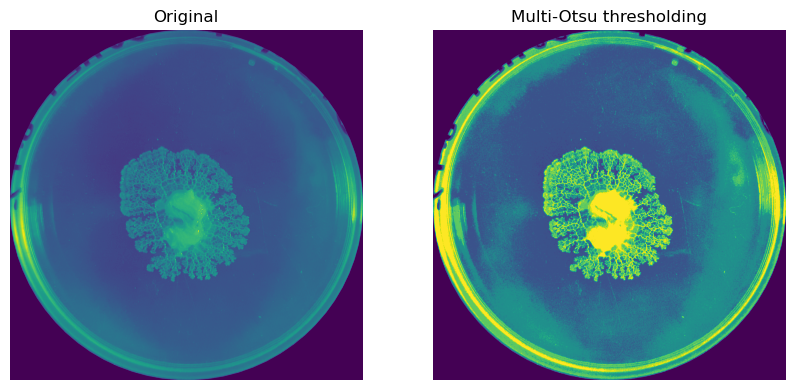

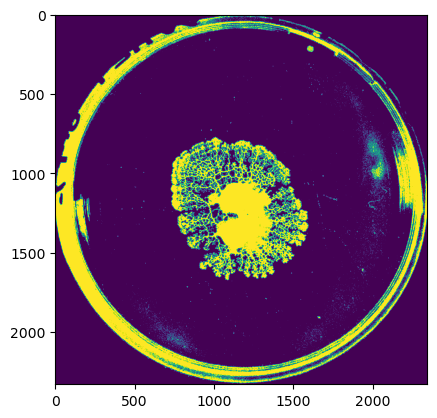

In [9]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV_FULL)
h, s, v = cv2.split(hsv)

# showImg(v)

clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(10,10))
cl1 = clahe.apply(gray)
# showImg(cl1)

# cl1 = gray.copy()

thresholds = filters.threshold_multiotsu(cl1, classes=5)
regions = np.digitize(cl1, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

slime_mould = (cl1 > thresholds[2])
slime_mould = slime_mould.astype(np.uint8)*255
cv2.imwrite(str(saveDir/"threshold.png"), slime_mould)
plt.imshow(slime_mould)

In [10]:
# if Path(saveDir/"mask.png").exists():
#     mask = cv2.imread(str(saveDir/"mask.png"), cv2.IMREAD_GRAYSCALE)
# else:
#     mask = slime_mould
mask = slime_mould

drawWindow = DrawingWindow("draw", cropped, mask)
drawWindow.displayWindow()
cv2.imwrite(str(saveDir/"mask.png"), drawWindow.mask)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread

True

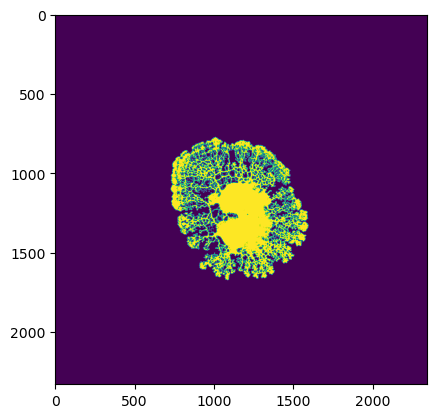

In [11]:
binarised = cv2.imread(str(saveDir/"mask.png"), cv2.IMREAD_GRAYSCALE)

cnts, hierarchy = cv2.findContours(binarised, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
largestCnt = max(cnts, key=cv2.contourArea)
idxs = np.where(map(cv2.contourArea, cnts))

innerCnts = []
for i in range(len(cnts)):
    if i not in idxs:
        continue

    h = hierarchy[0][i]
    # No parent, top-level
    if h[3] == -1:
        innerCnts.append(cnts[h[2]])
        child = hierarchy[0][h[2]]
        while child[0] != -1:
            innerCnts.append(cnts[child[0]])
            child = hierarchy[0][child[0]]

largestCntMask = np.zeros_like(binarised)
cv2.drawContours(largestCntMask, [largestCnt], -1, 255, -1)
cv2.drawContours(largestCntMask, innerCnts, -1, 0, -1)
binarised = cv2.bitwise_and(binarised, binarised, mask=largestCntMask)

cv2.imwrite(str(saveDir/"binarised.png"), binarised)
plt.imshow(binarised)

## Morph

data/slime_mould/04_w_v/271023_1530/whey


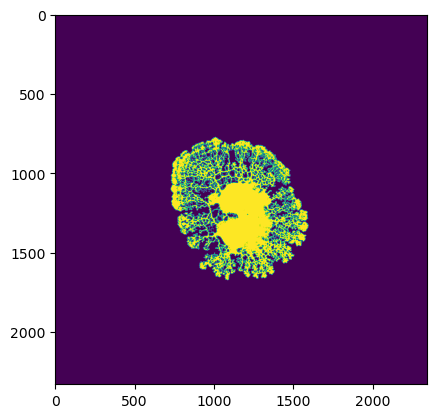

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread (0x3c2a510).
Cannot move to target thread (0x30c1870)

QObject::moveToThread: Current thread (0x30c1870) is not the object's thread

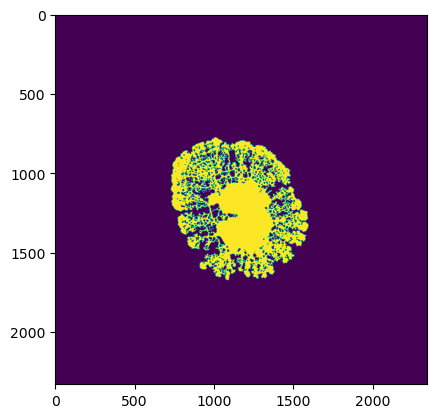

In [34]:
print(saveDir)
binarised = cv2.imread(str(saveDir/"binarised.png"), cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
morphed = cv2.morphologyEx(binarised, cv2.MORPH_CLOSE, kernel)
plt.imshow(binarised)
plt.show()
plt.imshow(morphed)

showImg(binarised)
showImg(morphed)

In [35]:
cv2.imwrite(str(saveDir/"morphed.png"), morphed)

True

## Crop and Perspective Transform

Do this step here so that pixel values required for thresholding are not affected.

# Network

In [36]:
def sholl(radii, center, skeleton):
    # perform sholl analysis
    center, radii, counts = sholl_analysis(
            Skeleton(skeleton), center=center, shells=radii
            )
    df = pd.DataFrame({'radius': radii, 'crossings': counts})

    return center, df

## Preliminary

In [37]:
_, saveDir = getSaveDir(C04_T1, "whey.jpg")

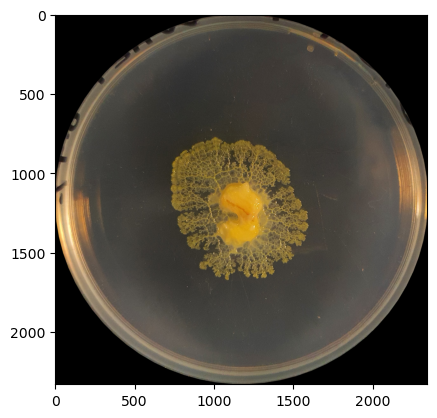

In [38]:
if Path(saveDir/"morphed.png").exists():
    binarised = cv2.imread(str(saveDir/"morphed.png"), cv2.IMREAD_GRAYSCALE)
else:
    binarised = cv2.imread(str(saveDir/"binarised.png"), cv2.IMREAD_GRAYSCALE)
cropped = cv2.imread(str(saveDir/"cropped.png"))
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))

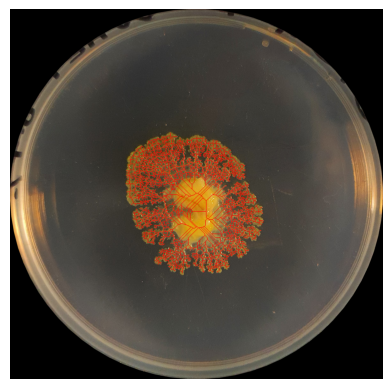

In [39]:
fig, ax = plt.subplots()
croppedRGB = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

skeleton = morphology.skeletonize(binarised)
pickle.dump(skeleton, open(saveDir/"skeleton.pkl", "wb"))
draw.overlay_skeleton_2d(croppedRGB, skeleton, dilate=1, axes=ax)
plt.savefig(saveDir/"skeleton.png", dpi=1200, bbox_inches="tight", pad_inches=0.0)

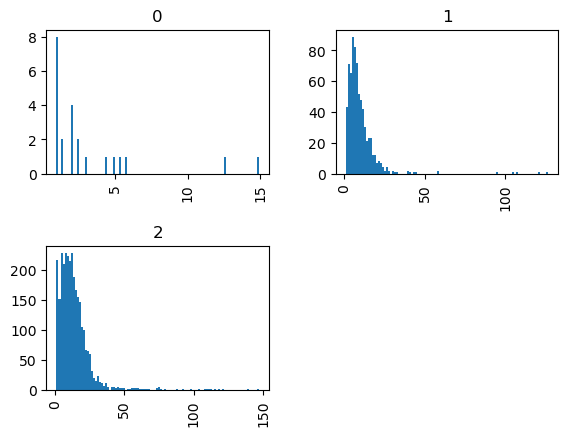

In [40]:
# branch_data = summarize(Skeleton(skeleton), find_main_branch=True)
branch_data = summarize(Skeleton(skeleton), find_main_branch=False)
branch_data.hist(column='branch-distance', by='branch-type', bins=100)

# 1. endpoint-to-endpoint (isolated branch)
# 2. junction-to-endpoint
# 3. junction-to-junction
# 4. isolated cycle
plt.savefig(saveDir/"histogram.svg", transparent=True)

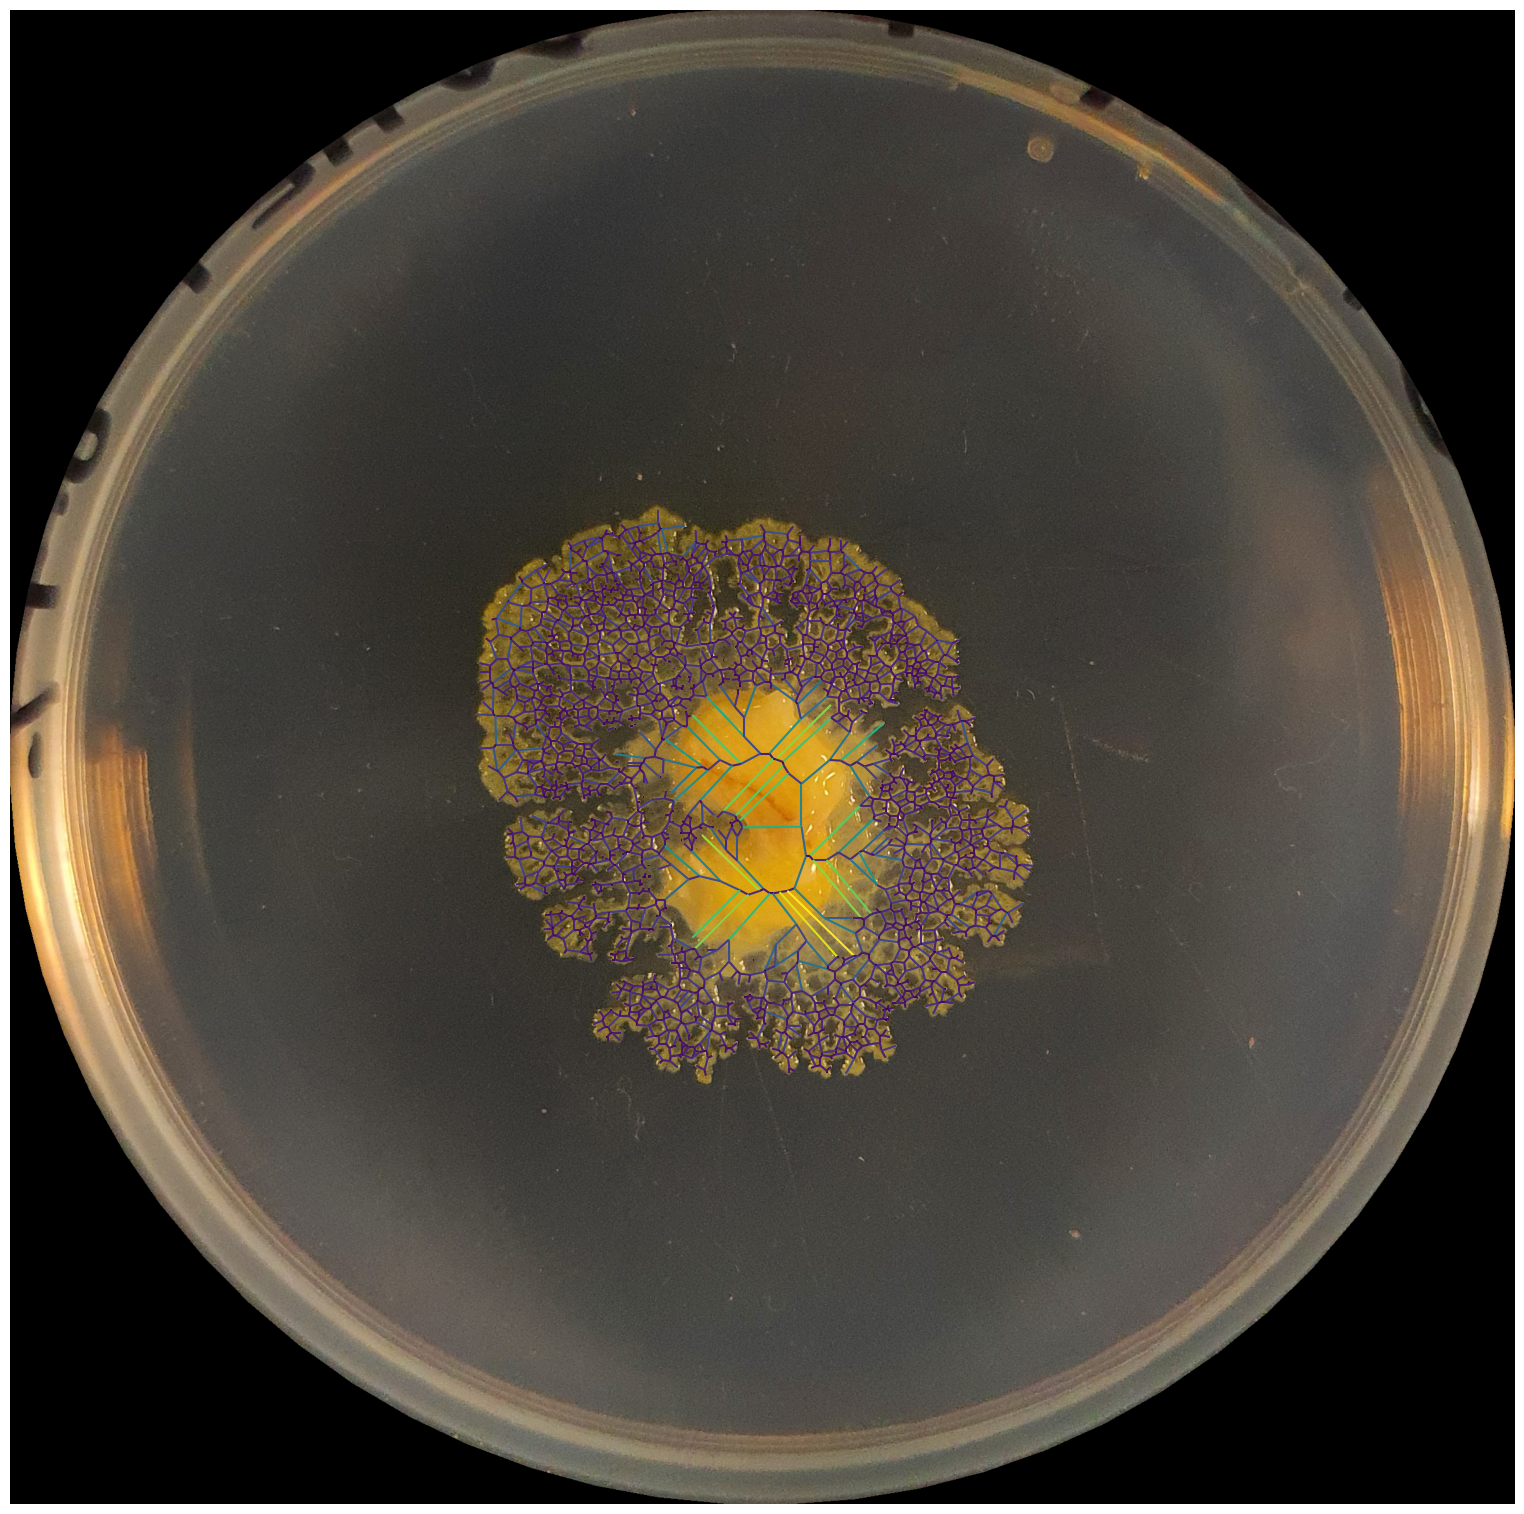

In [41]:
figsize = draw.pixel_perfect_figsize(croppedRGB, dpi=120)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot()
draw.overlay_euclidean_skeleton_2d(croppedRGB, branch_data,
                                   skeleton_color_source='branch-distance', axes=ax)
plt.savefig(saveDir/"branchLength.png", dpi=120, bbox_inches="tight", pad_inches=0.0)

## Pick Center

In [738]:
cropped = cv2.imread(str(saveDir/"cropped.png"))

# Choose centre of image
centerPickerWindow = SelectionWindow("Pick Center", cropped)
centerPickerWindow.displayWindow()
if len(centerPickerWindow.selectionPts) > 0:
    c = centerPickerWindow.selectionPts[-1][::-1]
    pickle.dump(c, open(saveDir/"center.pkl", "wb"))

# with open(saveDir/"center.pkl", "rb") as f:
#     c = pickle.load(f)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread (0x436ade0).
Cannot move to target thread (0x3120050)

QObject::moveToThread: Current thread (0x3120050) is not the object's thread

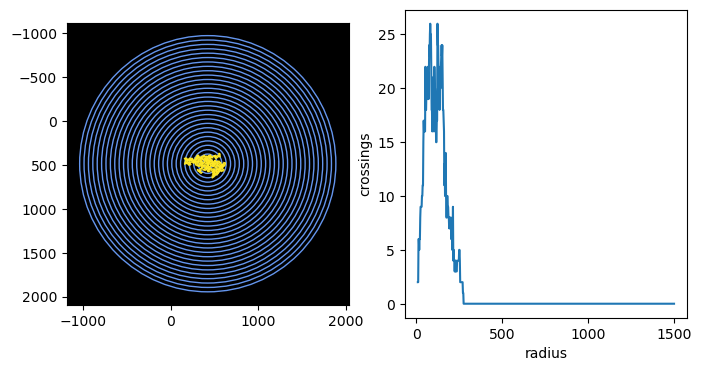

In [739]:
# define radii at which to measure crossings
radiiDisplay = np.arange(10, 1500, 50)
radii = np.arange(10, 1500, 2)


centerDisplay, dfDisplay = sholl(radiiDisplay, c, skeleton)
center, df = sholl(radii, c, skeleton)

# make two subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# draw the skeleton
draw.overlay_skeleton_2d_class(
        Skeleton(skeleton), skeleton_colormap='viridis_r', vmin=0, axes=ax0
        )
# draw the shells
draw.sholl_shells(centerDisplay, radiiDisplay, axes=ax0)
# fiddle with plot visual aspects
ax0.autoscale_view()
ax0.set_facecolor('black')
# ax0.set_ylim(75, 20)
# ax0.set_xlim(20, 80)
ax0.invert_yaxis()
ax0.set_aspect('equal')

# in second subplot, plot the Sholl analysis
ax1.plot('radius', 'crossings', data=df)
ax1.set_xlabel('radius')
ax1.set_ylabel('crossings')

plt.savefig(saveDir/"sholl.png", dpi=1200, bbox_inches="tight", pad_inches=0.0)
plt.show()

## Comparison

In [29]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def fitTwoLines(xData, yData):
    def fitLineRMS(x, y):
        slope, intercept, _, _, _ = linregress(x, y)
        return np.mean((y - (slope*x + intercept))**2) ** 0.5

    errors = []
    for i in range(2, len(xData)-2):
        xRising, yRising = xData[:i], yData[:i]
        xFalling, yFalling = xData[i:], yData[i:]
        errors.append(fitLineRMS(xRising, yRising)*len(xRising) + 2*fitLineRMS(xFalling, yFalling)*len(xFalling))
    
    return np.argmin(errors) - 1

In [30]:
def computeBranchingFactor(datasetDir, plot=True, plotSkeleton=True):
    with open(datasetDir/"skeleton.pkl", "rb") as f:
        skeleton = pickle.load(f)
    with open(datasetDir/"center.pkl", "rb") as f:
        center = pickle.load(f)
    
    lengthOfPlate = 0.075
    numberOfPixelsAlongImageLength = np.mean(skeleton.shape)
    numberOfPixelsPerMetre = numberOfPixelsAlongImageLength/lengthOfPlate
    metrePerPixel = 1/numberOfPixelsPerMetre

    if plotSkeleton:
        plt.imshow(skeleton)
        plt.show()

    # Compute crossings
    radii = np.arange(10, 1500, 2)
    center, df = sholl(radii, center, skeleton)
    crossings = np.array(df["crossings"])

    # Filter out radii where crossings is zero
    radii = radii[crossings > 0]
    crossings = crossings[crossings > 0]

    # Only fit the branching before fall-off
    turningPtIdx = fitTwoLines(radii, crossings)
    # The fitted line must pass through the first data point
    xRegress, yRegress = radii[:turningPtIdx + 1].copy(), crossings[:turningPtIdx + 1]
    xRegress -= radii[0]
    yRegress -= crossings[0]
    xRegress = xRegress[:,np.newaxis]
    slope, _, _, _ = np.linalg.lstsq(xRegress, yRegress)

    # Plot
    if plot:
        xPlot = np.linspace(radii[0], radii[turningPtIdx], 100)
        plt.scatter(radii, crossings, s=3)
        plt.plot(xPlot, (xPlot-radii[0])*slope-crossings[0], color="k", linestyle="--")
        plt.show()

    return slope[0]/metrePerPixel

/tmp/ipykernel_824/419785936.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, _, _, _ = np.linalg.lstsq(xRegress, yRegress)


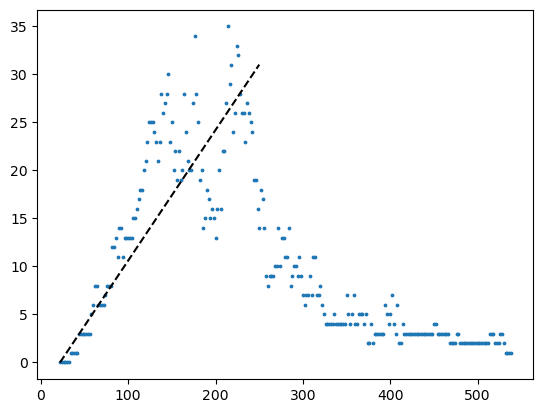

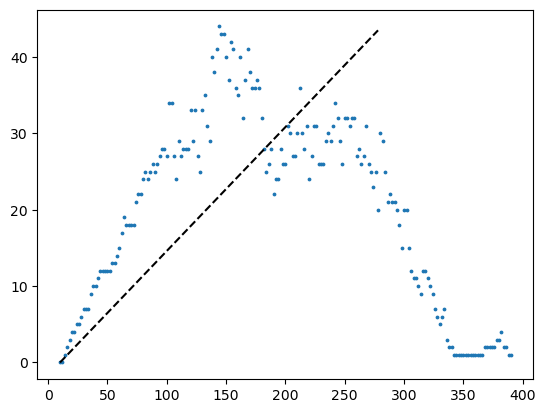

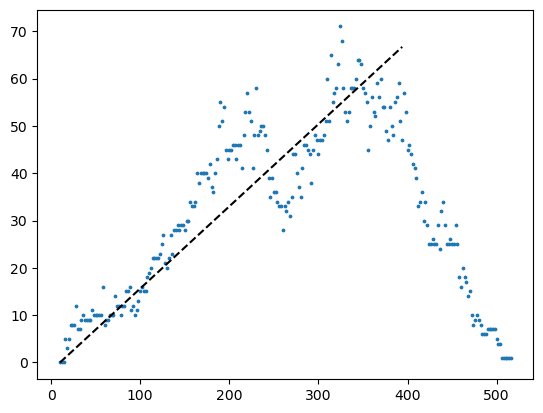

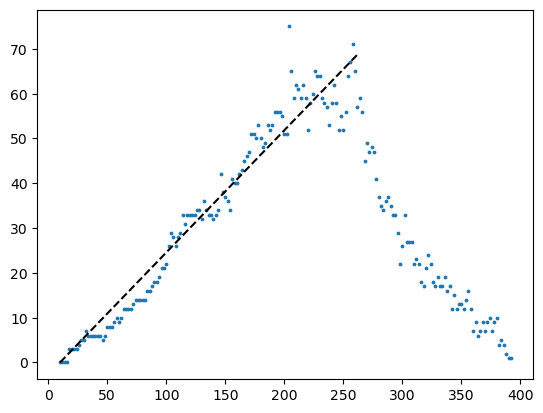

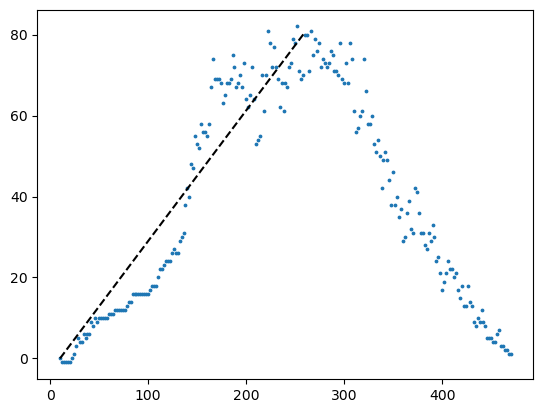

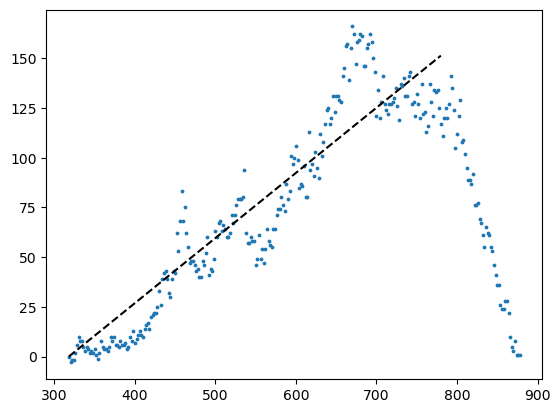

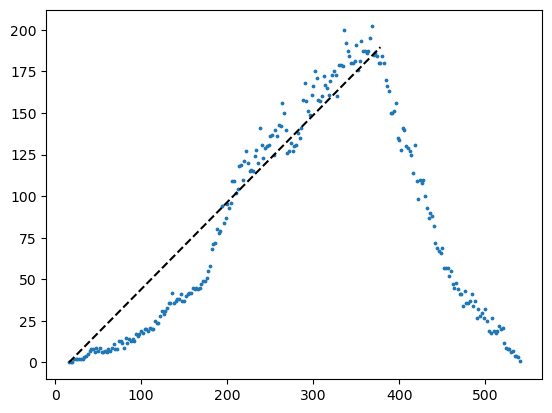

In [71]:
rootDir = Path("data/slime_mould/04_w_v/271023_1530/")
branchingFactors = []
datasets = ["nacl", "kcl", "../../controls/control2", "glucose", "msg", "pea", "whey"]

for dataset in datasets:
    # Load data
    datasetDir = rootDir/dataset
    branchingFactor = computeBranchingFactor(datasetDir)
    branchingFactors.append(branchingFactor)

<BarContainer object of 7 artists>

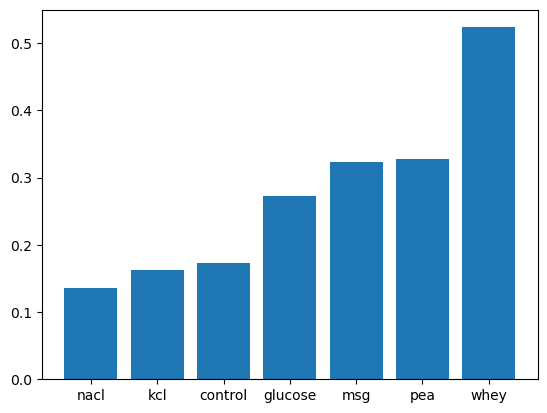

In [152]:
datasets[2] = "control"
datasets[-2] = "pea"
sortedIdxs = np.argsort(branchingFactors)
plt.bar(np.array(datasets)[sortedIdxs], np.array(branchingFactors)[sortedIdxs])

## Nodes

In [7]:
def skeleton_image_to_graph(skeIm, connectivity=2):
    assert(len(skeIm.shape) == 2)
    skeImPos = np.stack(np.where(skeIm))
    skeImPosIm = np.zeros_like(skeIm, dtype=np.uint8)
    skeImPosIm[skeImPos[0], skeImPos[1]] = np.arange(0, skeImPos.shape[1])
    g = nx.Graph()
    if connectivity == 1:
        neigh = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    elif connectivity == 2:
        neigh = np.array([[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [1, -1], [-1, 1], [-1, -1]])
    else:
        raise ValueError(f'unsupported connectivity {connectivity}')
    for idx in range(skeImPos[0].shape[0]):
        for neighIdx in range(neigh.shape[0]):
            curNeighPos = skeImPos[:, idx] + neigh[neighIdx]
            if np.any(curNeighPos<0) or np.any(curNeighPos>=skeIm.shape):
                continue
            if skeIm[curNeighPos[0], curNeighPos[1]] > 0:
                g.add_edge(skeImPosIm[skeImPos[0, idx], skeImPos[1, idx]], skeImPosIm[curNeighPos[0], curNeighPos[1]], weight=np.linalg.norm(neigh[neighIdx]))
    g.graph['physicalPos'] = skeImPos.T
    return g

In [8]:
skeleton = morphology.skeletonize(binarised)
graph = skeleton_image_to_graph(skeleton, connectivity=2)

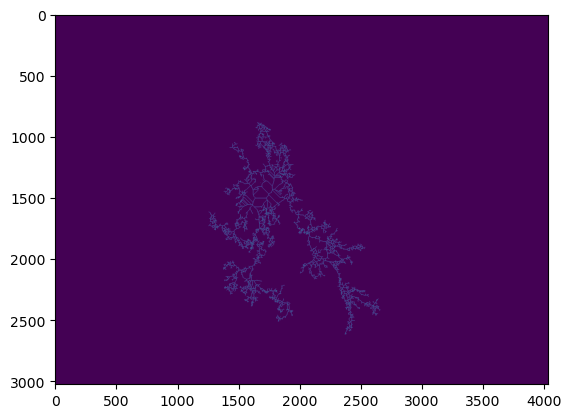

In [9]:
plt.imshow(skeleton)

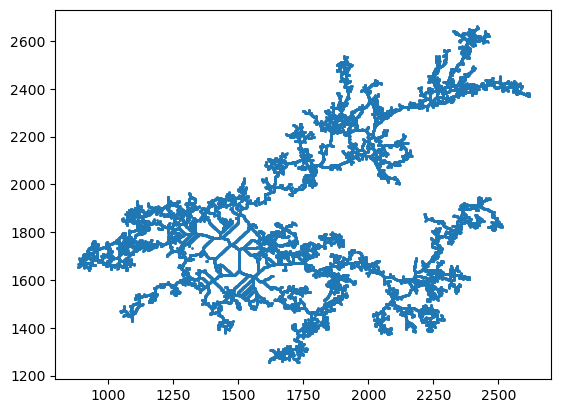

In [11]:
x = graph.graph['physicalPos']
plt.scatter(x[:,0], x[:,1], s=1)

In [286]:
dst = cv2.cornerHarris(skeleton, 1, 1, 0.04)
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
mask[dst > 0.01*dst.max()] = [0, 0, 255]
showImg(mask)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread (0x2d85d60).
Cannot move to target thread (0x360b9a0)

QObject::moveToThread: Current thread (0x360b9a0) is not the object's thread

In [287]:
dst.max()

0.0

In [ ]:
G = nx.Graph([(0, 1), (1, 2), (5, 6), (3, 4)])
nx.node_connected_component(G, 0)

In [ ]:
import networkx as nx
import numpy as np



# Check Processing

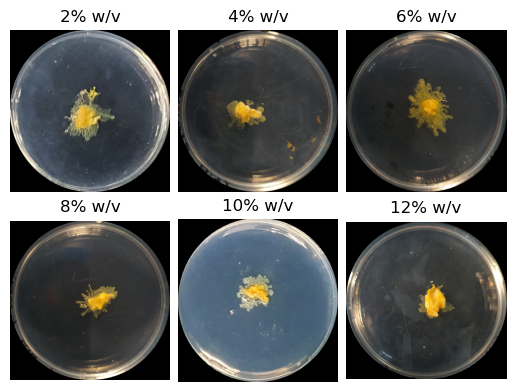

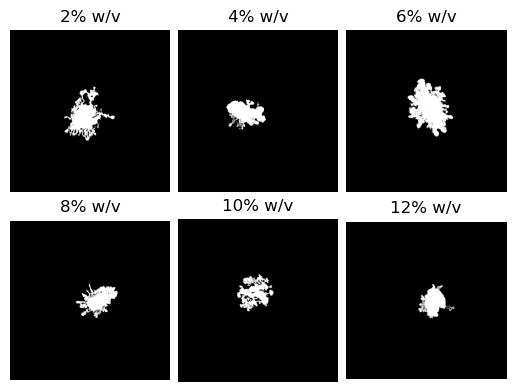

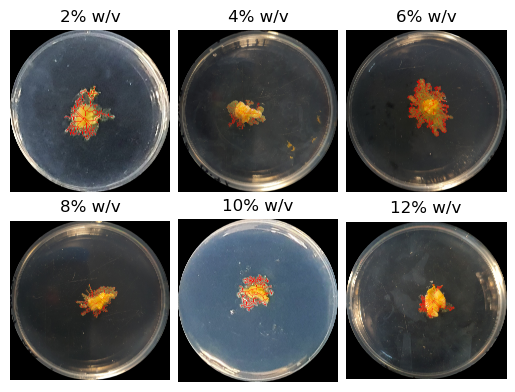

In [785]:
def getImagesAgainstConcentration(substance, imageType):    
    if imageType == "binarised":
        imgName = "binarised.png"
    elif imageType == "skeleton":
        imgName = "skeleton.png"
    elif imageType == "cropped":
        imgName = "cropped.png"

    fig, axes = plt.subplots(2,3)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    conc = 2
    for i, CONC_DAY_ONE in enumerate(CONCS_DAY_ONE):
        imgPath = rootDir/paths[CONC_DAY_ONE]/substance/imgName
        img = cv2.imread(str(imgPath))
        
        ax = axes[i//3][i%3]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        ax.set_title(f"{conc}% w/v")
        ax.axis('off')
        conc += 2
    
    plt.savefig(rootDir/f"presentation_media/{substance}_against_concs_{imageType}.svg", transparent=True,
                bbox_inches="tight", pad_inches=0.0, dpi=1200)
    plt.show()

substance = "glucose"
getImagesAgainstConcentration(substance, "cropped")
getImagesAgainstConcentration(substance, "binarised")
getImagesAgainstConcentration(substance, "skeleton")

# Best concentration

In [42]:
def processSubstance(substance, plot=True, plotSkeleton=True):
    rootDir = Path("data/slime_mould/")

    # concentrations = ["02_w_v/261023_1413", "04_w_v/271023_1530", "06_w_v/271023_1549", "08_w_v/271023_1603"]
    # concentrations = ["04_w_v/271023_1530", "06_w_v/271023_1549", "08_w_v/271023_1603"]

    branchingFactors = []

    for concentration in CONCS_DAY_ONE:
        datasetDir = rootDir/paths[concentration]/substance
        branchingFactor = computeBranchingFactor(datasetDir, plot=plot, plotSkeleton=plotSkeleton)
        branchingFactors.append(branchingFactor)

    return CONCS_NUMERIC, np.array(branchingFactors)/100 # convert m^-1 to cm^-1

/tmp/ipykernel_151084/1245760685.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  slope, _, _, _ = np.linalg.lstsq(xRegress, yRegress)


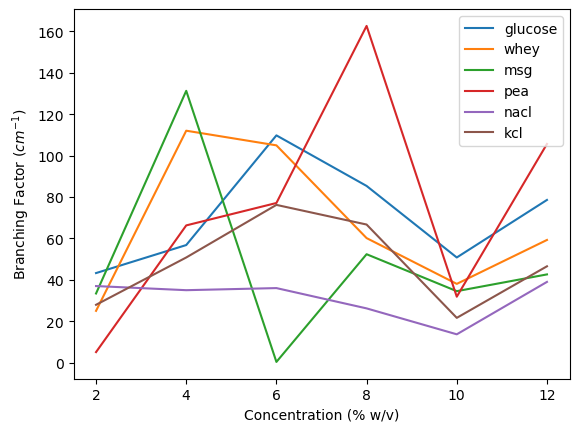

In [43]:
glucose = processSubstance("glucose", plot=False, plotSkeleton=False)
whey = processSubstance("whey", plot=False, plotSkeleton=False)
msg = processSubstance("msg", plot=False, plotSkeleton=False)
pea = processSubstance("pea", plot=False, plotSkeleton=False)
nacl = processSubstance("nacl", plot=False, plotSkeleton=False)
kcl = processSubstance("kcl", plot=False, plotSkeleton=False)

plt.plot(*glucose, label="glucose")
plt.plot(*whey, label="whey")
plt.plot(*msg, label="msg")
plt.plot(*pea, label="pea")
plt.plot(*nacl, label="nacl")
plt.plot(*kcl, label="kcl")

plt.xlabel("Concentration (% w/v)")
plt.ylabel("Branching Factor ($cm^{-1}$)")
plt.savefig(rootDir/"presentation_media/branchingfactor_conc.svg", transparent=True, bbox_inches="tight", pad_inches=0.0)
plt.legend()

# Animations

## FFT

In [ ]:
def plotFFT(mode):
    amplitude = 0.2
    radius = 1
    N = 10000

    theta = np.linspace(0, 2*np.pi, N)
    r = radius + amplitude*np.sin(mode*theta)
    plt.plot(theta, r)
    plt.show()

    x = r*np.cos(theta)
    y = r*np.sin(theta)
    plt.plot(x, y)
    plt.gca().set_aspect('equal')
    plt.show()

    nRepeats = 20
    thetaRepeat = np.linspace(0, nRepeats*2*np.pi, N*nRepeats)
    rRepeat = np.tile(r, nRepeats)
    # plt.plot(thetaRepeat, rRepeat)
    # plt.show()

    yf = fft(rRepeat)
    xf = fftfreq(N*nRepeats, np.diff(thetaRepeat)[0])[:N*nRepeats//2]
    plt.plot(2*np.pi*xf[1:N*nRepeats//2], 2.0/N*nRepeats * np.abs(yf[1:N*nRepeats//2]))
    plt.xlim(2, 6)
    plt.xticks([2, 3, 4, 5, 6])
    plt.show()

In [ ]:
plotFFT(3)

In [ ]:
plotFFT(4)

In [ ]:
amplitude = 0.2
radius = 1
mode = 4
N = 10000

theta = np.linspace(0, 2*np.pi, N)
r = radius + amplitude*np.sin(mode*theta)
plt.plot(theta, r)
plt.show()

x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x, y)
plt.gca().set_aspect('equal')
plt.show()

nRepeats = 20
thetaRepeat = np.linspace(0, nRepeats*2*np.pi, N*nRepeats)
rRepeat = np.tile(r, nRepeats)

plt.plot(thetaRepeat, rRepeat)
plt.show()

yf = fft(rRepeat)
xf = fftfreq(N*nRepeats, np.diff(thetaRepeat)[0])[:N*nRepeats//2]
plt.plot(2*np.pi*xf[1:N*nRepeats//2], 2.0/N*nRepeats * np.abs(yf[1:N*nRepeats//2]))
plt.xlim(0, 10)

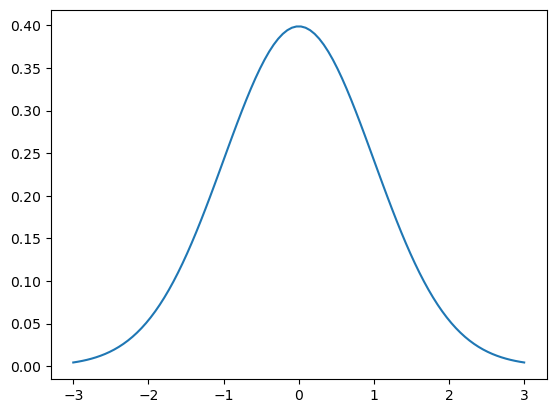

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.savefig("data/slime_mould/misc/normal.svg", transparent=True)
plt.show()

# Ad-hoc Crop

In [24]:
# imgPath = saveDir/"mask.png"

# img = cv2.imread(str(imgPath))
# with open(saveDir/"ellipse.pkl", "rb") as f:
#     ellipse = pickle.load(f)
# img = cropWithEllipse(img, ellipse)
# showImg(img)
# cv2.imwrite(str(imgPath), img)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread (0x57f8ed0).
Cannot move to target thread (0x54a3010)

QObject::moveToThread: Current thread (0x54a3010) is not the object's thread

True